Initial exploration of the dataset for Two Sigma & RentHop's Kaggle contest on rental listing inquiries.  
https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries

We are given some statistics and information about ~50k online rental listings, and the objective is to predict the level of interest each one will receive.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
def set_figure_size(y,x):
    plt.figure(figsize=((x,y)))

In [3]:
df = ( pd.read_json("data/train.json")
         .reset_index(drop=True) )
df.shape

(49352, 15)

In [4]:
df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

In [5]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [6]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
3,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
4,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


### Target quantity - 'interest_level'

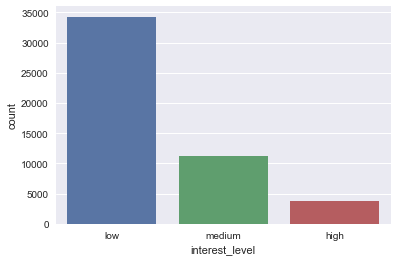

In [7]:
target_classes = ['low', 'medium', 'high']
sns.countplot(x='interest_level', order=target_classes, data=df)

The classes are highly imbalanced, which could make the learning tricky.

### Bathrooms

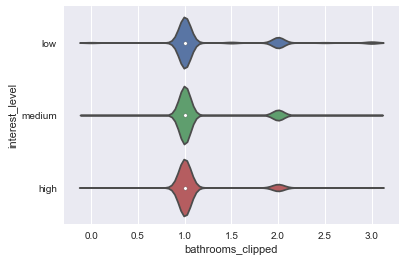

In [8]:
hi_threshold = df.bathrooms.quantile(0.99)
df['bathrooms_clipped'] = df.bathrooms.clip(upper=hi_threshold)

sns.violinplot(x='bathrooms_clipped', 
               y='interest_level', order=target_classes,
               data=df)

The distributions look pretty similar, except that the 'low-interest' category has more outliers near the high end.

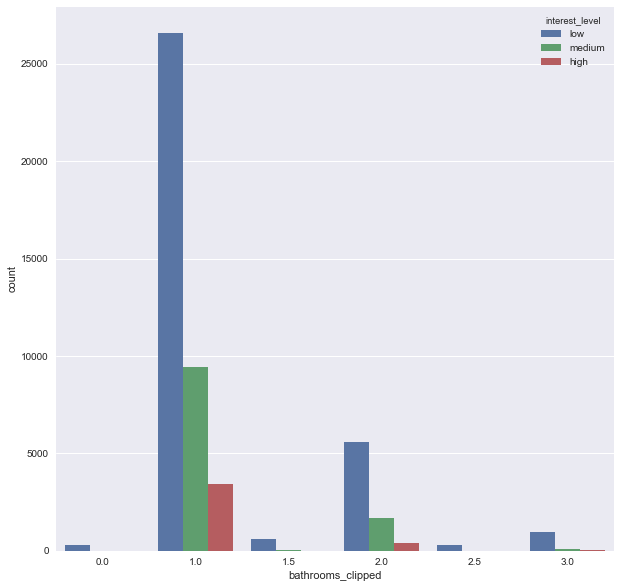

In [9]:
set_figure_size(10,10)
sns.countplot(x='bathrooms_clipped', 
              hue='interest_level', hue_order=target_classes, 
              data=df)

### Bedrooms

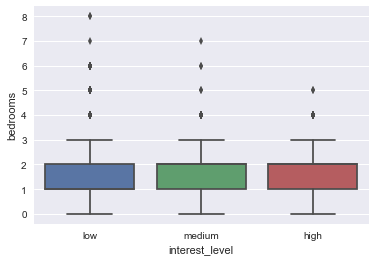

In [10]:
sns.boxplot(x='interest_level', order=target_classes,
            y='bedrooms',
            data=df)

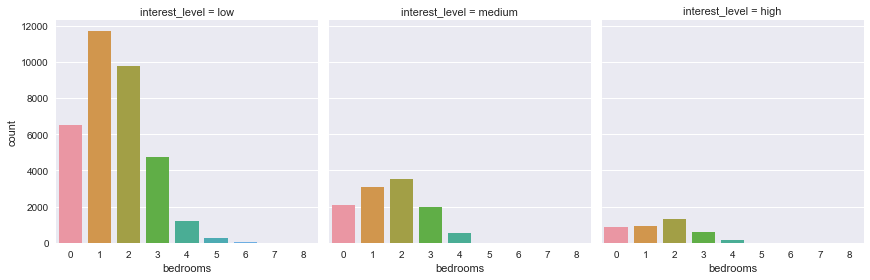

In [11]:
sns.factorplot(x='bedrooms', 
               col='interest_level', col_order=target_classes,
               data=df, 
               kind='count')

Still no major differences in the distribution-shapes across the 3 classes.  
There does seem to be some difference in the relative counts of listings with 1 and 2 bedrooms.  

### Price

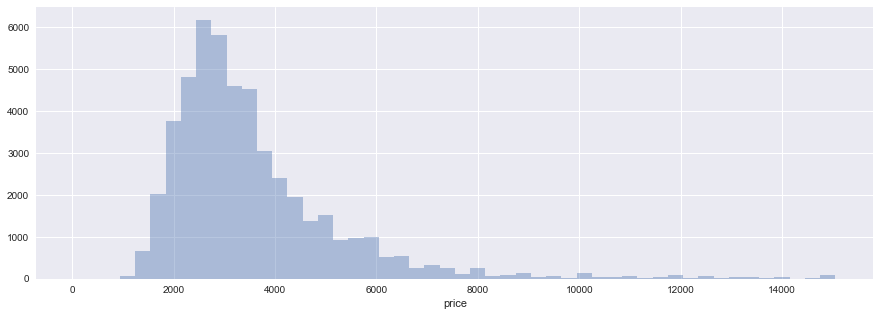

In [12]:
set_figure_size(5,15)

hi_threshold = df.price.quantile(0.995)
sns.distplot(df[df.price < hi_threshold].price,
             kde=False)

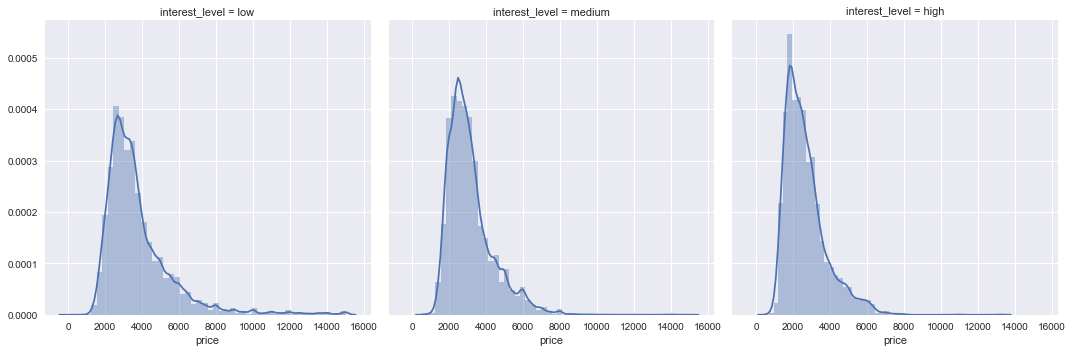

In [22]:
g = sns.FacetGrid(data=df[df.price < hi_threshold], 
                  col='interest_level', col_order=target_classes, size=5)

g.map(sns.distplot, "price")

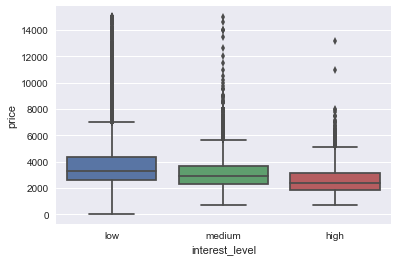

In [34]:
sns.boxplot(x='interest_level', order=target_classes,
            y='price',
            data=df[df.price < hi_threshold])

We seem to be getting somewhere, listings in the high-interest category seem to be relatively more confined to lower prices.

### Price vs Bedrooms
Let's see how the price of listings varies with the number of bedrooms.

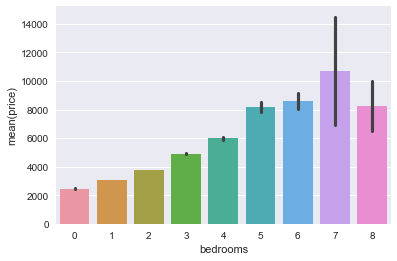

In [43]:
sns.barplot(y='price', 
            x='bedrooms',
            data=df[df.price < hi_threshold])

Let's see if this trend is different across the 3 target-classes.

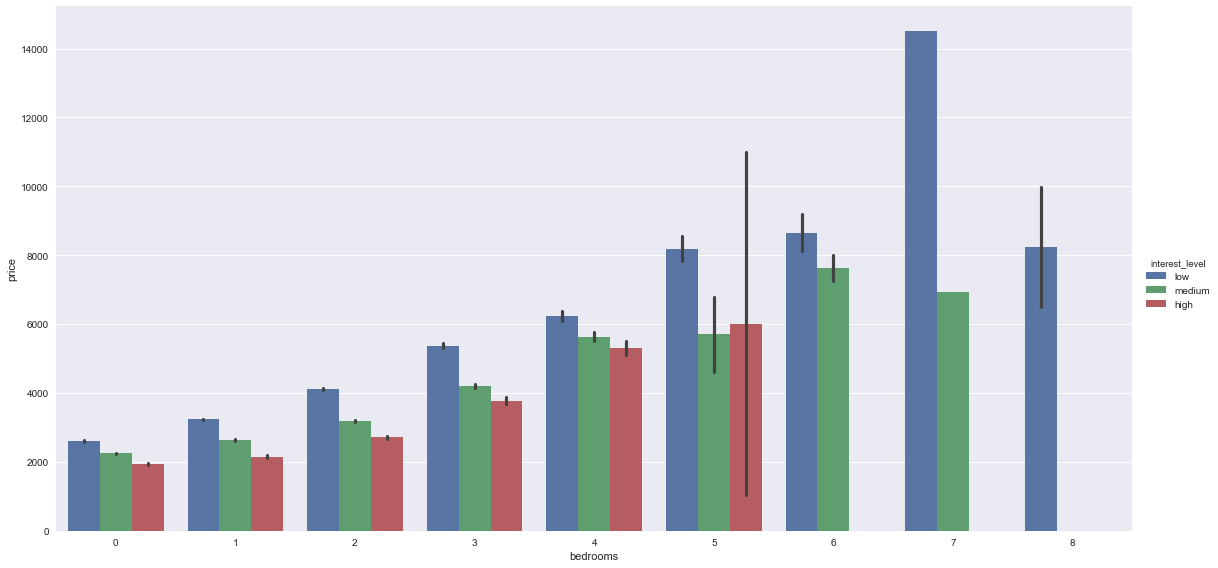

In [50]:
sns.factorplot(x='bedrooms',
               y='price',
               hue='interest_level', hue_order=target_classes,
               data=df[df.price < hi_threshold],
               kind='bar',
               size=8, aspect=2)

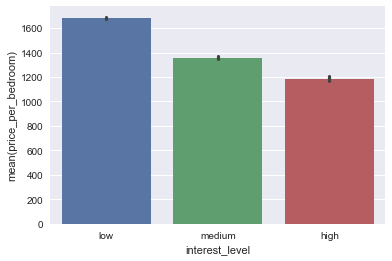

In [73]:
df['price_per_bedroom'] = df.price / (df.bedrooms + 1)

sns.barplot(x='interest_level', order=target_classes,
            y='price_per_bedroom',
            data=df[df.price < hi_threshold])

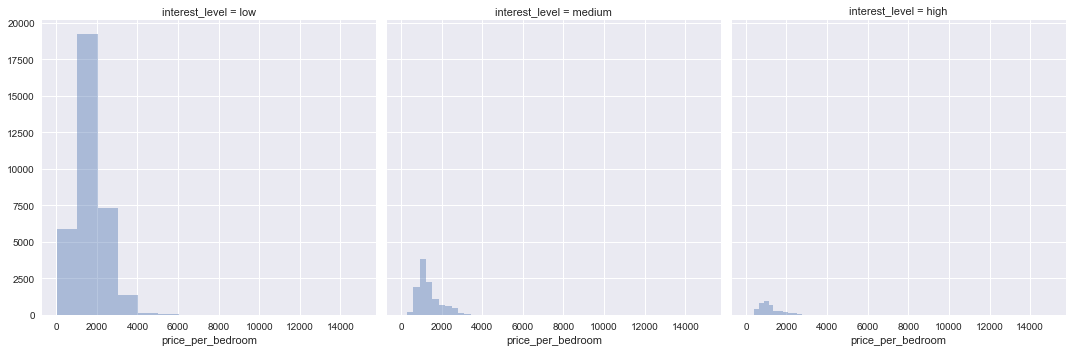

In [74]:
g = sns.FacetGrid(data=df[df.price < hi_threshold], 
                  col='interest_level', col_order=target_classes, size=5)

g.map(sns.distplot, 'price_per_bedroom', kde=False, bins=15)

### Visualize latitude/longitude

Let's mask the outliers, so we can zoom into the area with the majority of the data

In [79]:
latitude_hi_threshold = df.latitude.quantile(0.995)
latitude_lo_threshold = df.latitude.quantile(0.005)

longitude_hi_threshold = df.longitude.quantile(0.995)
longitude_lo_threshold = df.longitude.quantile(0.005)

mask = ( (df.latitude < latitude_hi_threshold) & (df.latitude > latitude_lo_threshold) & 
         (df.longitude < longitude_hi_threshold) & (df.longitude > longitude_lo_threshold) )

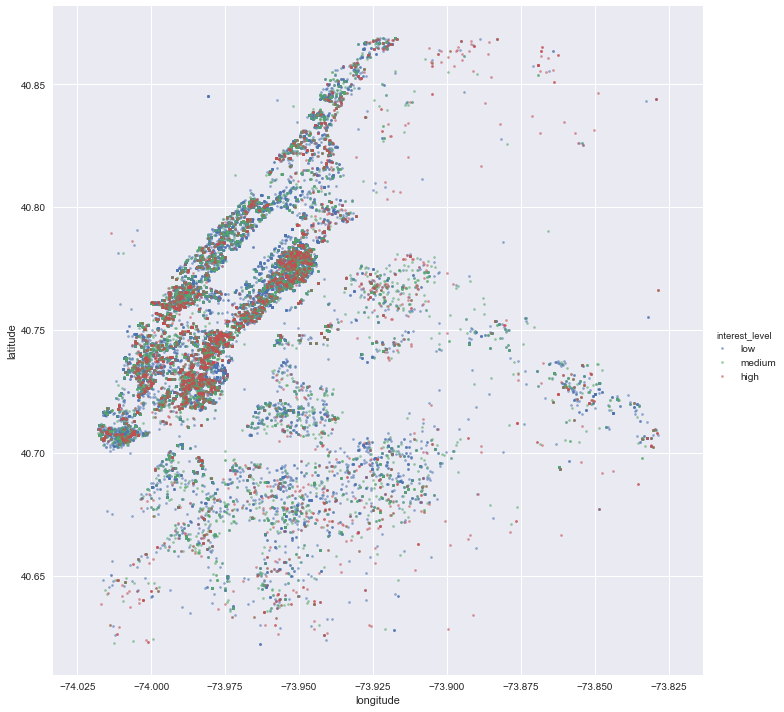

In [85]:
sns.lmplot(x='longitude', y='latitude', data=df[mask], 
           hue='interest_level', hue_order=target_classes,
           fit_reg=False, 
           scatter_kws={'alpha':0.6, 's':7}, size=10)

We can clearly see an outline of the Manhattan peninsula, with a big gap for central park.  
The high-interest listings seem to lie more frequently in manhattan than the other neighborhoods.

### Number of photos

In [86]:
df['num_photos'] = df.photos.map(len)

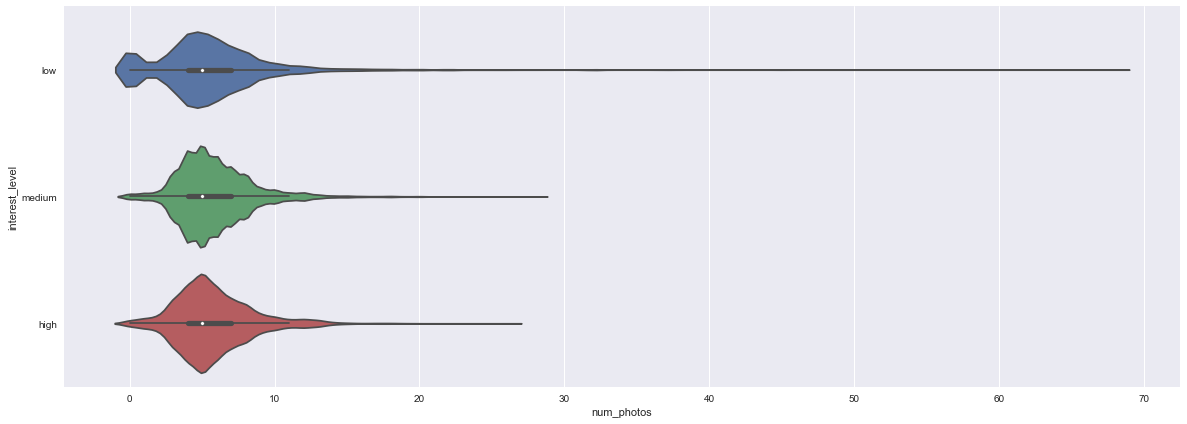

In [148]:
set_figure_size(7,20)
sns.violinplot(x='num_photos', 
               y='interest_level', order=target_classes,
               data=df)

Although the avergae number of photos is around the same for all 3 classes, the 'low-interest' class does have some unique presence in the extreme-low and extreme-high ends of the range of values.

### Description length

In [103]:
df['words_in_description'] = df.description.map(lambda d: len(d.split()))

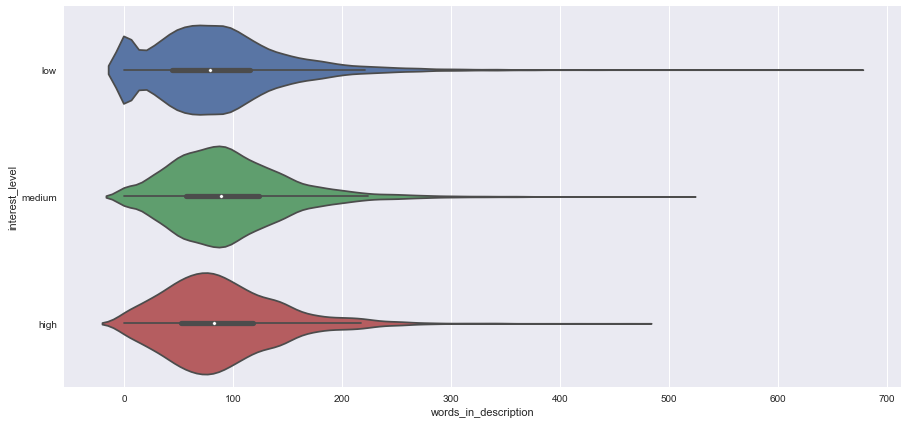

In [151]:
set_figure_size(7,15)
sns.violinplot(y='interest_level', order=target_classes,
               x='words_in_description',
               data=df)

The trend and differences between the classes again looks similar to the "number_of_photos" feature.

### Listing creation date/time

In [133]:
df['created'] = pd.to_datetime(df['created'])

df['created_month'] = df.created.dt.month
df['created_day'] = df.created.dt.dayofweek
df['created_hour'] = df.created.dt.hour

#### Creation day

In [110]:
df.created_day.value_counts()

2    9414
1    8417
3    8195
4    7593
5    6953
6    4541
0    4239
Name: created_day, dtype: int64

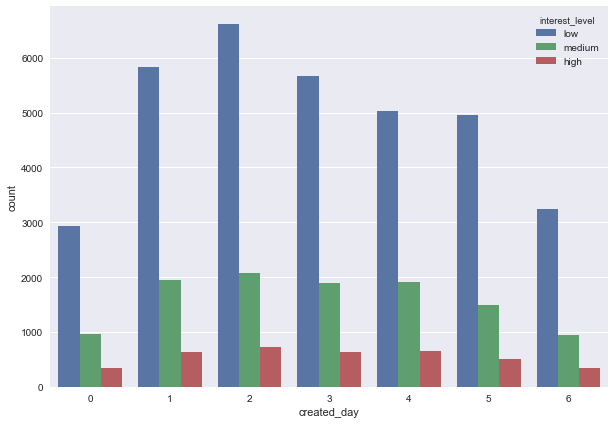

In [124]:
set_figure_size(7,10)

sns.countplot(x='created_day', 
              hue='interest_level', hue_order=target_classes,
              data=df)

It might be useful to flip the variables and group the bars for each interest-level together.  
Let's do that below:

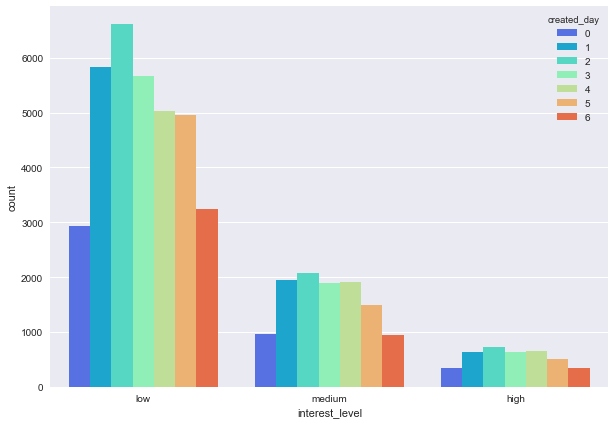

In [129]:
set_figure_size(7,10)
sns.countplot(x='interest_level', order=target_classes,
              hue='created_day', 
              data=df, 
              palette='rainbow')

The trend is still pretty similar across the target-classes, but there are subtle differences which might be helpful during classification.

#### Creation month

In [111]:
df.created_month.value_counts()

6    17144
4    16411
5    15797
Name: created_month, dtype: int64

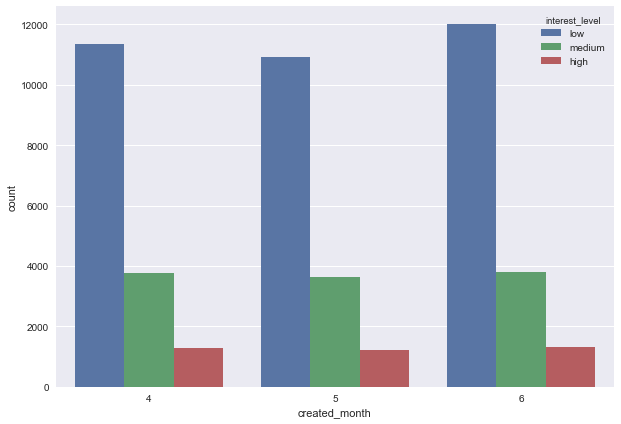

In [125]:
set_figure_size(7,10)
sns.countplot(x='created_month',
              hue='interest_level', hue_order=target_classes,
              data=df)

#### Creation hour-of-day

In [134]:
df.created_hour.value_counts()

2     10596
3      8318
5      7954
1      5749
4      5021
6      4446
7      1047
14      782
15      753
12      693
13      616
18      450
11      444
17      443
16      370
8       336
10      284
19      266
20      191
21      178
22      139
9       135
23       86
0        55
Name: created_hour, dtype: int64

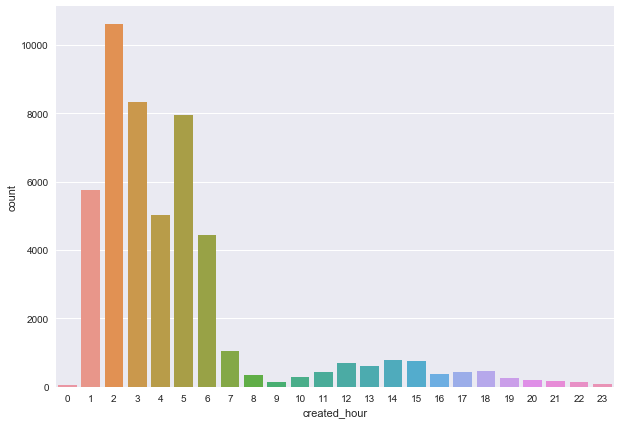

In [138]:
set_figure_size(7,10)
sns.countplot(x='created_hour',
              data=df)

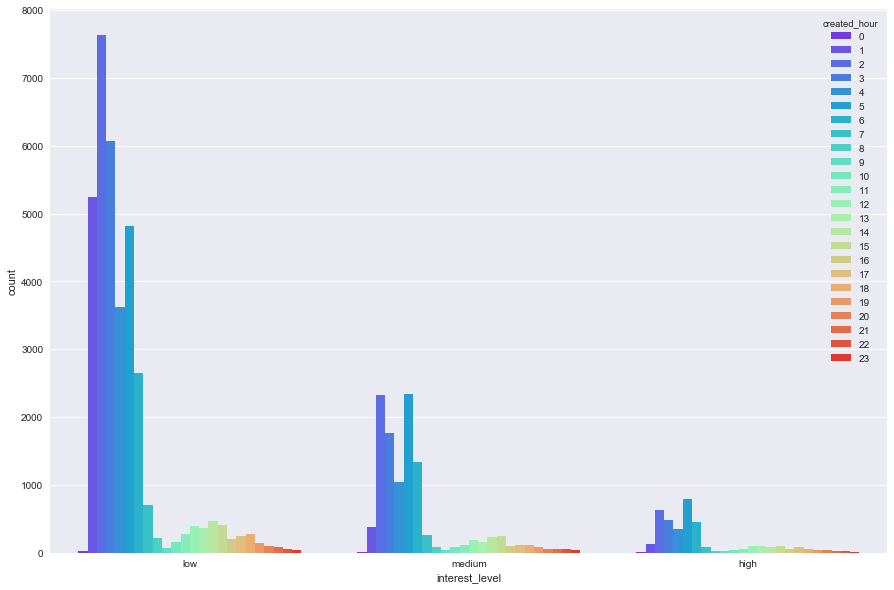

In [140]:
set_figure_size(10,15)
sns.countplot(x='interest_level', order=target_classes,
              hue='created_hour', 
              data=df, 
              palette='rainbow')

### "features" column

In [141]:
df['num_features'] = df.features.map(len)

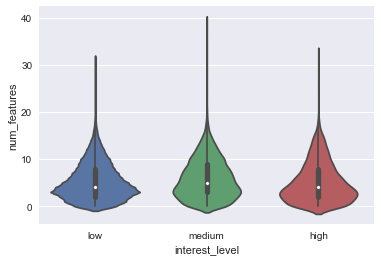

In [144]:
sns.violinplot(x='interest_level', order=target_classes,
               y='num_features',
               data=df)

Overall, there aren't too many obvious differences between the 3 target-classes.  
This classification-task is likely to become an exercise in teasing out the subtleties.  
Maybe some serious-feature engineering is in order.